In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pyflux as pf

matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)


In [2]:
total =  pd.read_csv('avg_price.txt',encoding='gbk')
total.head()

,Unnamed: 0,HOUSE_SRN,CITY,AREA,DATA_DATE,AVG_PRICE,DATA_DATE_Y,DATA_DATE_M,DATA_DATE_RM
0,0,1,北京,朝阳,2004-03-05,6000.0,2004.0,3.0,3.0
1,1,1,北京,朝阳,2012-03-09,4850.0,2012.0,3.0,99.0
2,2,1,北京,朝阳,2014-07-01,40782.0,2014.0,7.0,126.0
3,3,1,北京,朝阳,2014-12-01,35559.0,2014.0,12.0,131.0
4,4,1,北京,朝阳,2015-01-01,35358.0,2015.0,1.0,133.0


In [3]:
samp = total[total['AREA'] == u'朝阳'].groupby(['DATA_DATE_RM']).mean().reset_index()
samp.head()

,DATA_DATE_RM,Unnamed: 0,AVG_PRICE,DATA_DATE_Y,DATA_DATE_M
0,-1.0,10727.875000,7885.000000,2003.0,11.125
1,0.0,13109.314050,6948.864407,2003.0,12.000
2,1.0,17110.375000,7003.870968,2004.0,1.000
3,2.0,22821.100000,6019.555556,2004.0,2.100
4,3.0,17362.066667,7576.533333,2004.0,3.000


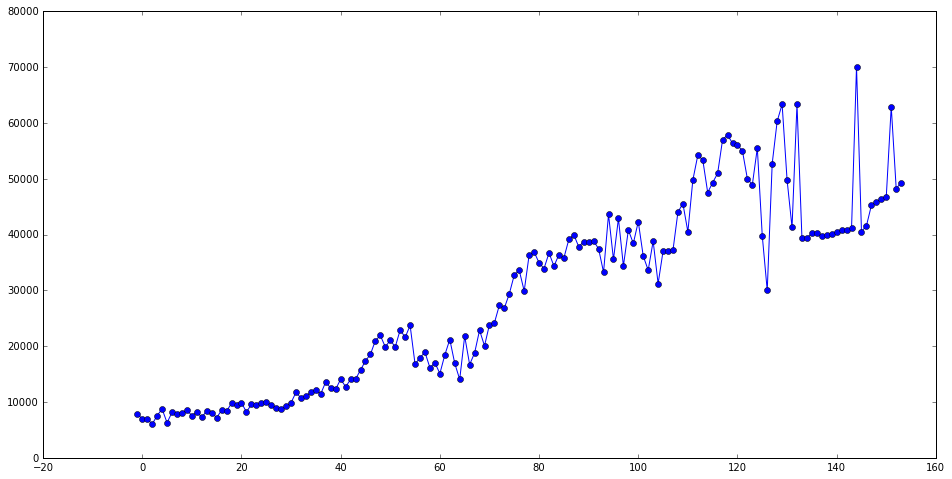

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


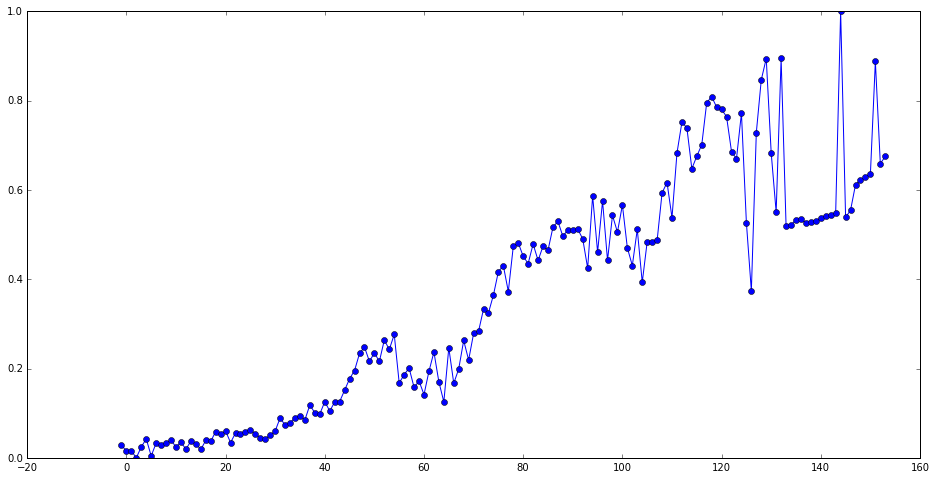

In [4]:
# split into trainset and testset
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing


length = samp.shape[0]
index = samp.DATA_DATE_RM.values
samples = samp['AVG_PRICE'].astype(np.float32).values
plt.plot(index,samples,'-o')
plt.show()
min_max_scaler = preprocessing.MinMaxScaler()
samples = min_max_scaler.fit_transform(samples)
plt.plot(index,samples.reshape(length,1),'-o')
plt.show()

In [5]:
# ARIMA algorithms
model = pf.ARIMA(ar=1,ma=0,integ=1,data=samp,target='AVG_PRICE')
model.adjust_prior([0] , pf.Normal(0,30000))
print(model.latent_variables)

Index    Latent Variable           Prior           Prior Hyperparameters     V.I. Dist  Transform 
======== ========================= =============== ========================= ========== ==========
0        Constant                  Normal          mu0: 0, sigma0: 30000     Normal     None      
1        AR(1)                     Normal          mu0: 0, sigma0: 0.5       Normal     None      
2        Normal Scale              Flat            n/a (non-informative)     Normal     exp       


In [6]:
x = model.fit('MLE')
x.summary()

Normal ARIMA(1,1,0)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced AVG_PRICE               Method: MLE                                       
Start Date: 1                                           Log Likelihood: -1538.2256                        
End Date: 154                                           AIC: 3082.4512                                    
Number of observations: 153                             BIC: 3091.5425                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0002     457.2373   0.0      1.0      (-896.1849 | 896.1852)   
AR(1)                                

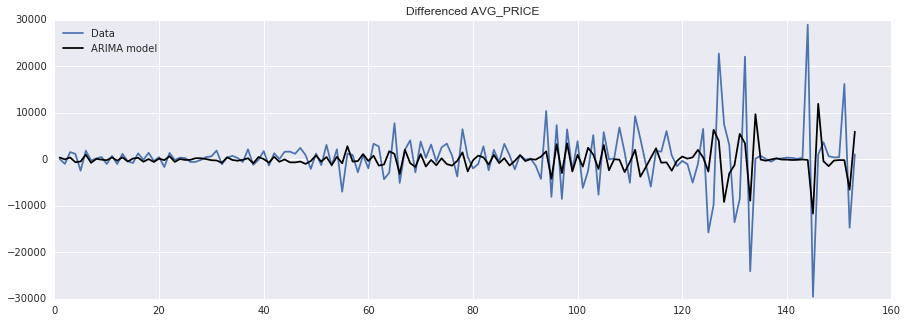

In [7]:
model.plot_fit(figsize=(15,5))

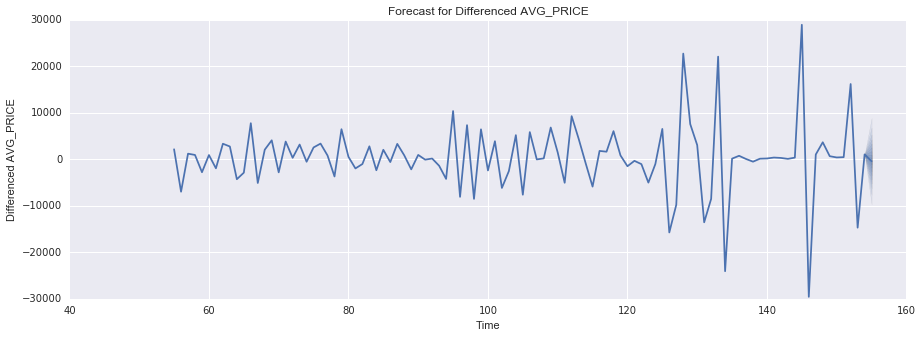

In [9]:
model.plot_predict(h=1,past_values=100,figsize=(15,5))

In [7]:
returns = pd.DataFrame(samp.AVG_PRICE.values)
# returns.to_csv('avg_chaoyang')
returns.index = returns.index.values + 1
model = pf.LMEGARCH(returns,p=1,q=1)
x = model.fit()
x.summary()

Hessian not invertible! Consider a different model specification.

LMEGARCH(1,1)                                                                                             
======================================================= ==================================================
Dependent Variable: 0                                   Method: MLE                                       
Start Date: 2                                           Log Likelihood: -1745.4448                        
End Date: 155                                           AIC: 3504.88966526                                
Number of observations: 154                             BIC: 3526.14833347                                
Latent Variable                          Estimate  
======================================== ==========
Vol Constant                             17.9607   
Component 1 p(1)                         0.0       
Component 1 q(1)                         0.0       
Component 2 p(1)               

In [67]:
returns.head()

,0
1,7885.000000
2,6948.864407
3,7003.870968
4,6019.555556
5,7576.533333


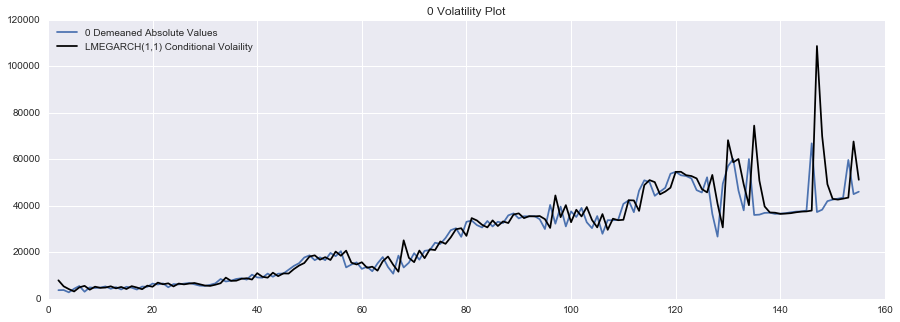

In [8]:
model.plot_fit(figsize=(15,5))